### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set ()

### Load the dataset

In [3]:
covid = pd.read_csv ('COVID19BE.csv')
covid.head (10)

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Antwerpen,Flanders,40-49,M,1
1,2020-03-01,Brussels,Brussels,10-19,F,1
2,2020-03-01,Brussels,Brussels,10-19,M,1
3,2020-03-01,Brussels,Brussels,20-29,M,1
4,2020-03-01,Brussels,Brussels,30-39,F,1
5,2020-03-01,Brussels,Brussels,40-49,F,1
6,2020-03-01,Brussels,Brussels,50-59,M,1
7,2020-03-01,Liège,Wallonia,40-49,M,3
8,2020-03-01,Limburg,Flanders,70-79,M,1
9,2020-03-01,OostVlaanderen,Flanders,50-59,F,1


In [3]:
covid.dropna (inplace= True)
covid.count ()

DATE        32628
PROVINCE    32628
REGION      32628
AGEGROUP    32628
SEX         32628
CASES       32628
dtype: int64

### Pie chart

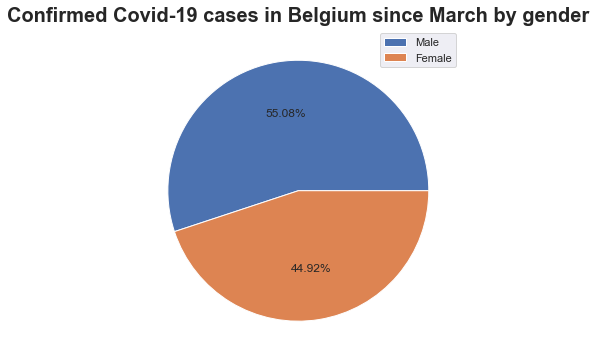

In [176]:
gender = covid.groupby ('SEX')
gender = gender['CASES'].agg(np.sum)

plt.figure (figsize = (10,6))

labels = ['Male', 'Female']

plt.pie(gender, autopct = '%.2f%%')

plt.title ('Confirmed Covid-19 cases in Belgium since March by gender', fontsize = 20, fontweight =
          'bold')

plt.legend (labels)

plt.show ()

### Bar chart

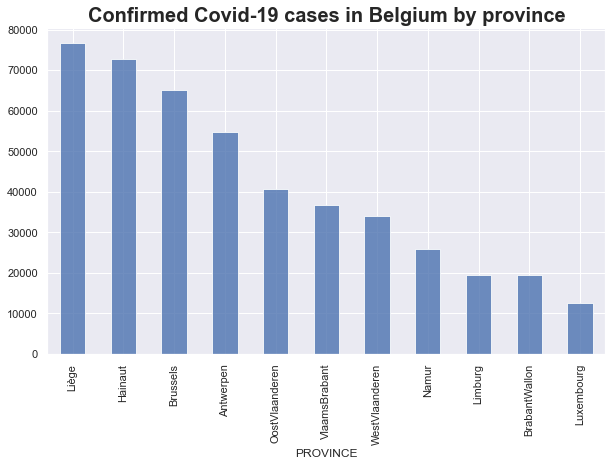

In [179]:
province = covid.groupby('PROVINCE')
province = province['CASES'].agg(np.sum)
province = province.sort_values(ascending = False)

plt.figure(figsize = (10,6))

province.plot(kind = 'bar', alpha = .8)

plt.title ('Confirmed Covid-19 cases in Belgium by province', fontsize = 20, fontweight = 'bold')

plt.show ()

### Timeserie

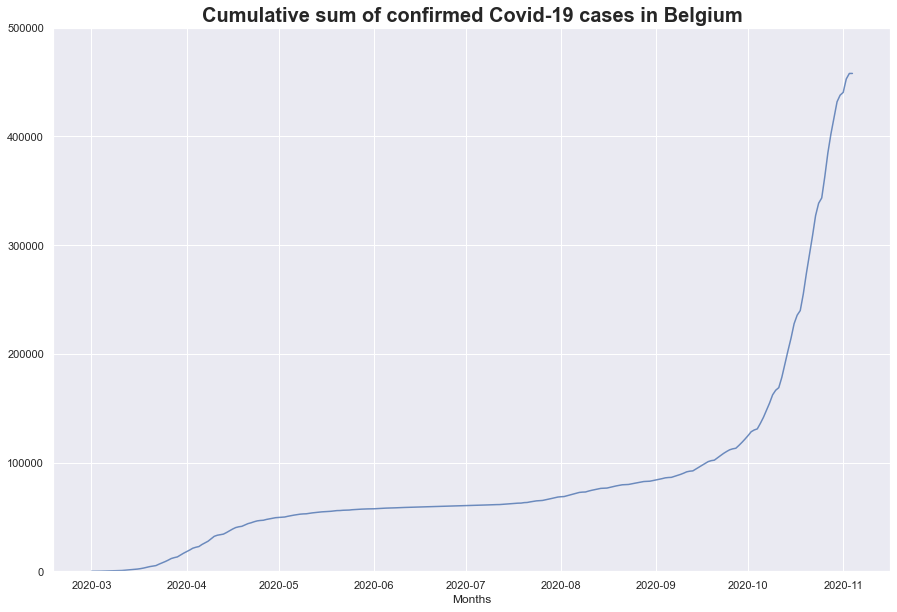

In [180]:
date = covid.groupby ('DATE')
date = date.agg(np.sum)
date['CUMSUM_C'] = date['CASES'].cumsum()

date.index = pd.to_datetime(date.index)

plt.figure (figsize = (15,10))

plt.plot (date['CUMSUM_C'], alpha = 0.8)

plt.title ('Cumulative sum of confirmed Covid-19 cases in Belgium', fontsize = 20, fontweight = 'bold')
plt.xlabel ('Months')

plt.ylim (0,500000)

plt.show ()